In [47]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_csv('diamonds.csv')
df.head()

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,None,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,None,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,None,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200


In [18]:
#create a new dataframe with only lab GIA
df_GIA = df[df['lab'] == 'GIA']

#create a new dataframe with only lab IGI
df_IGI = df[df['lab'] == 'IGI']

#create a new dataframe with only lab HRD
df_HRD = df[df['lab'] == 'HRD']

In [19]:
print('Lab Ranges\n')
gia_range = df_GIA['total_sales_price'].agg(get_column_range)
#find the range of the total sales price for each lab
print(f'GIA: {gia_range}')

igi_range = df_IGI['total_sales_price'].agg(get_column_range)
print(f'IGI: {igi_range}')

hrd_range = df_HRD['total_sales_price'].agg(get_column_range)
print(f'HRD: {hrd_range}')

Lab Ranges

GIA: 1449639
IGI: 591132
HRD: 1121470


In [20]:
print('Lab Means\n')
#find the mean of the total sales price for each lab

gia_mean = df_GIA['total_sales_price'].mean()
print(f'GIA {gia_mean}')

igi_mean = df_IGI['total_sales_price'].mean()
print(f'IGI {igi_mean}')

hrd_mean = df_HRD['total_sales_price'].mean()
print(f'HRD {hrd_mean}')

Lab Means

GIA 6731.1869692766695
IGI 6536.1348881184995
HRD 19056.25205640423


In [21]:
#find the median of the total sales price for each lab
print('Lab Medians\n')
gia_median = df_GIA['total_sales_price'].median()
print(f'GIA {gia_median}')

igi_median = df_IGI['total_sales_price'].median()
print(f'IGI {igi_median}')

hrd_median = df_HRD['total_sales_price'].median()
print(f'HRD {hrd_median}')

Lab Medians

GIA 1902.0
IGI 2046.0
HRD 8254.5


<AxesSubplot:>

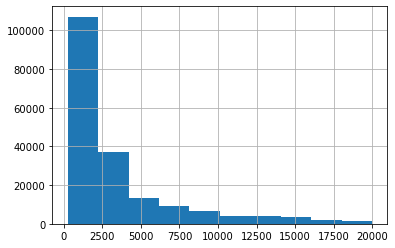

In [32]:
#filter df_GIA to only include diamonds with a total sales price greater than 20000
df_GIA_filtered = df_GIA[df_GIA['total_sales_price'] < 20000]

df_GIA_filtered['total_sales_price'].hist()

<AxesSubplot:>

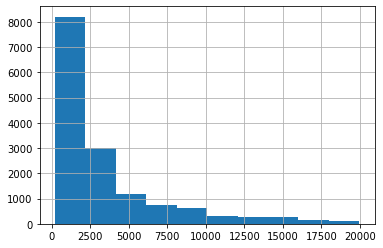

In [33]:
#do the same thing for IGI
df_IGI_filtered = df_IGI[df_IGI['total_sales_price'] < 20000]

df_IGI_filtered['total_sales_price'].hist()

<AxesSubplot:>

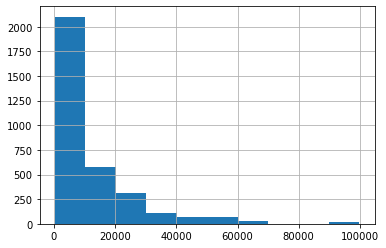

In [35]:
#do the same thing for HRD
df_HRD_filtered = df_HRD[df_HRD['total_sales_price'] < 100000]

df_HRD_filtered['total_sales_price'].hist()


In [36]:
#find out if which lab the diamond is certified by has an effect on the total sales price
#first, create a new column that is a boolean value for whether the diamond is certified by GIA
df['GIA'] = df['lab'] == 'GIA'

#do the same thing for IGI
df['IGI'] = df['lab'] == 'IGI'

#do the same thing for HRD
df['HRD'] = df['lab'] == 'HRD'

#find the correlation between the total sales price and the boolean values for GIA, IGI, and HRD
df[['total_sales_price', 'GIA', 'IGI', 'HRD']].corr()

#the correlation between the total sales price and the boolean values for GIA, IGI, and HRD is very low

,total_sales_price,GIA,IGI,HRD
total_sales_price,1.000000,-0.021975,-0.003997,0.058706
GIA,-0.021975,1.000000,-0.899774,-0.404598
IGI,-0.003997,-0.899774,1.000000,-0.034998
HRD,0.058706,-0.404598,-0.034998,1.000000


In [44]:
#find the correlation between the total sales price and the cut
#first, create a new column that is a boolean value for each type of cut
df['Round'] = df['cut'] == 'Round'
df['Princess'] = df['cut'] == 'Princess'
df['Cushion'] = df['cut'] == 'Cushion'
df['Emerald'] = df['cut'] == 'Emerald'
df['Asscher'] = df['cut'] == 'Asscher'
df['Radiant'] = df['cut'] == 'Radiant'
df['Oval'] = df['cut'] == 'Oval'
df['Pear'] = df['cut'] == 'Pear'
df['Marquise'] = df['cut'] == 'Marquise'
df['Heart'] = df['cut'] == 'Heart'

#find the average total sales price for each type of cut
df.groupby('cut')['total_sales_price'].median()

#find the correlation between the total sales price and the boolean values for each type of cut
#df[['total_sales_price', 'Round', 'Princess', 'Cushion', 'Emerald', 'Asscher', 'Radiant', 'Oval', 'Pear', 'Marquise', 'Heart']].corr()

#interpret the data
#the correlation between the total sales price and the boolean values for each type of cut is very low

cut
Asscher             8115.0
Cushion             8288.0
Cushion Modified    6480.0
Emerald             3704.0
Heart               3556.0
Marquise            1998.0
Oval                4279.0
Pear                3628.0
Princess            4063.0
Radiant             6286.0
Round               1370.0
Name: total_sales_price, dtype: float64

In [45]:
#find the correlation between the total sales price and the color
#first, create a new column that is a boolean value for each type of color
df['D'] = df['color'] == 'D'
df['E'] = df['color'] == 'E'
df['F'] = df['color'] == 'F'
df['G'] = df['color'] == 'G'
df['H'] = df['color'] == 'H'
df['I'] = df['color'] == 'I'
df['J'] = df['color'] == 'J'
df['K'] = df['color'] == 'K'
df['L'] = df['color'] == 'L'
df['M'] = df['color'] == 'M'
df['N'] = df['color'] == 'N'
df['O'] = df['color'] == 'O'
df['P'] = df['color'] == 'P'
df['Q'] = df['color'] == 'Q'
df['R'] = df['color'] == 'R'
df['S'] = df['color'] == 'S'
df['T'] = df['color'] == 'T'
df['U'] = df['color'] == 'U'
df['V'] = df['color'] == 'V'
df['W'] = df['color'] == 'W'
df['X'] = df['color'] == 'X'
df['Y'] = df['color'] == 'Y'
df['Z'] = df['color'] == 'Z'

#find the median total sales price for each type of color
df.groupby('color')['total_sales_price'].median()

#find the correlation between the total sales price and the boolean values for each type of color
#df[['total_sales_price', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']].corr()


color
D          1584.0
E          1242.0
F          1510.0
G          2331.0
H          2692.0
I          2294.0
J          1998.0
K          1630.0
L          1890.0
M          2280.0
unknown    6932.0
Name: total_sales_price, dtype: float64

In [46]:
#find the correlation between the total sales price and the clarity
#first, create a new column that is a boolean value for each type of clarity
df['FL'] = df['clarity'] == 'FL'
df['IF'] = df['clarity'] == 'IF'
df['VVS1'] = df['clarity'] == 'VVS1'
df['VVS2'] = df['clarity'] == 'VVS2'
df['VS1'] = df['clarity'] == 'VS1'
df['VS2'] = df['clarity'] == 'VS2'
df['SI1'] = df['clarity'] == 'SI1'
df['SI2'] = df['clarity'] == 'SI2'
df['I1'] = df['clarity'] == 'I1'
df['I2'] = df['clarity'] == 'I2'
df['I3'] = df['clarity'] == 'I3'

#find the median total sales price for each type of clarity
df.groupby('clarity')['total_sales_price'].median()


#find the average total sales price for each type of clarity
#df.groupby('clarity')['total_sales_price'].mean()
#find the correlation between the total sales price and the boolean values for each type of clarity
#df[['total_sales_price', 'FL', 'IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1', 'I2', 'I3']].corr()


clarity
I1      3068.0
I2      3053.0
I3      2250.0
IF      1836.0
SI1     2136.0
SI2     2424.0
SI3      329.0
VS1     2040.0
VS2     2176.0
VVS1    1446.0
VVS2    1530.0
Name: total_sales_price, dtype: float64

In [56]:
# Load the dataset
df = pd.read_csv('diamonds.csv')

# Display the first few rows
print(df.head())

# Display column names
print(df.columns)

# Display a summary of the dataset
print(df.describe())

   Unnamed: 0    cut color clarity  carat_weight cut_quality  lab   symmetry  \
0           0  Round     E    VVS2          0.09   Excellent  IGI  Very Good   
1           1  Round     E    VVS2          0.09   Very Good  IGI  Very Good   
2           2  Round     E    VVS2          0.09   Excellent  IGI  Very Good   
3           3  Round     E    VVS2          0.09   Excellent  IGI  Very Good   
4           4  Round     E    VVS2          0.09   Very Good  IGI  Very Good   

      polish eye_clean  ... meas_depth girdle_min  girdle_max  fluor_color  \
0  Very Good   unknown  ...       1.79          M           M      unknown   
1  Very Good   unknown  ...       1.78        STK         STK      unknown   
2  Very Good   unknown  ...       1.77         TN           M      unknown   
3  Very Good   unknown  ...       1.78          M         STK      unknown   
4  Excellent   unknown  ...       1.82        STK         STK      unknown   

   fluor_intensity  fancy_color_dominant_color  fa

In [57]:
df['cut'].value_counts()

Round               158316
Oval                 13857
Emerald              11091
Pear                  9860
Princess              7050
Radiant               5630
Heart                 4774
Cushion Modified      3984
Marquise              2916
Asscher               1696
Cushion                529
Name: cut, dtype: int64

In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Function to remove outliers using IQR method
def remove_outliers_iqr(df, column, multiplier=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Load the CSV file into a pandas dataframe
df = pd.read_csv('diamonds.csv')

# Remove outliers for 'total_sales_price' column
df = remove_outliers_iqr(df, 'total_sales_price')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('total_sales_price', axis=1), df['total_sales_price'], test_size=0.2, random_state=42)

# Preprocess the data using column transformers and pipelines
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, ['carat_weight', 'meas_depth']),
    ('cat', categorical_transformer, ['cut', 'color', 'clarity', 'cut_quality', 'lab', 'symmetry', 'polish', 'eye_clean', 'girdle_min', 'girdle_max', 'fluor_color', 'fluor_intensity', 'fancy_color_dominant_color', 'fancy_color_secondary_color', 'fancy_color_overtone', 'fancy_color_intensity'])
])

# Train and evaluate the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Squared Error: 599818.9365785385
Root Mean Squared Error: 774.4797844866827
R2 Score: 0.8994962918148413


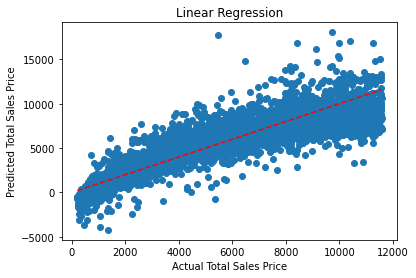

In [60]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Total Sales Price')
plt.ylabel('Predicted Total Sales Price')
plt.title('Linear Regression')
plt.show()

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the CSV file into a pandas dataframe
df = pd.read_csv('diamonds.csv')

# Select the columns of interest
X = df[['carat_weight']]
y = df['total_sales_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model using the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the diamond prices using the testing data
y_pred = model.predict(X_test)

# Evaluate the performance of the model
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Squared Error: 367245569.7618838
Root Mean Squared Error: 19163.652307477398
R2 Score: 0.5272214458975548


This code selects the 'carat_weight', 'cut', 'color', and 'clarity' columns as features for the regression model

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import numpy as np

# Load the CSV file into a pandas dataframe
df = pd.read_csv('diamonds.csv')

# Remove the outliers from the 'total_sales_price' column
q1 = df['total_sales_price'].quantile(0.25)
q3 = df['total_sales_price'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
df = df[(df['total_sales_price'] >= lower_bound) & (df['total_sales_price'] <= upper_bound)]

# Select the features and target variable
X = df[['carat_weight', 'cut', 'color', 'clarity']]
y = df['total_sales_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data using column transformers and pipelines
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, ['carat_weight']),
    ('cat', categorical_transformer, ['cut', 'color', 'clarity'])
])

# Train the model using the training data
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model.fit(X_train, y_train)

# Predict the diamond prices using the testing data
y_pred = model.predict(X_test)

# Evaluate the performance of the model
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Squared Error: 833583.7332964711
Root Mean Squared Error: 913.0080685823489
R2 Score: 0.8603274235438313


In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
import numpy as np

# Load the CSV file into a pandas dataframe
df = pd.read_csv('diamonds.csv')

# Remove the outliers from the 'total_sales_price' column
q1 = df['total_sales_price'].quantile(0.25)
q3 = df['total_sales_price'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
df = df[(df['total_sales_price'] >= lower_bound) & (df['total_sales_price'] <= upper_bound)]

# Select the features and target variable
X = df[['carat_weight', 'cut', 'color', 'clarity']]
y = df['total_sales_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data using column transformers and pipelines
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2))
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, ['carat_weight']),
    ('cat', categorical_transformer, ['cut', 'color', 'clarity'])
])

# Train the model using the training data
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model.fit(X_train, y_train)

# Predict the diamond prices using the testing data
y_pred = model.predict(X_test)

# Evaluate the performance of the model
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Squared Error: 798058.3512227222
Root Mean Squared Error: 893.3411169439825
R2 Score: 0.8662799409042745


In [70]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Load the dataset
df = pd.read_csv("diamonds.csv")

# Remove outliers
q1 = df['total_sales_price'].quantile(0.25)
q3 = df['total_sales_price'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
df = df[(df['total_sales_price'] >= lower_bound) & (df['total_sales_price'] <= upper_bound)]

# Select the features and target variable
X = df[['carat_weight', 'cut', 'color', 'clarity']]
y = df['total_sales_price']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the model using OLS regression
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      total_sales_price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                 3.915e+04
Date:                Sun, 09 Apr 2023   Prob (F-statistic):               0.00
Time:                        19:07:29   Log-Likelihood:            -1.5828e+06
No. Observations:              192373   AIC:                         3.166e+06
Df Residuals:                  192341   BIC:                         3.166e+06
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -2741.9879 

In [74]:
from sklearn.ensemble import RandomForestRegressor

# Create a new Random Forest model
model = RandomForestRegressor()

# Select the features and target variable
X = df[['carat_weight', 'cut', 'color', 'clarity']]
y = df['total_sales_price']

# One-hot encode the categorical variables
X = pd.get_dummies(X, drop_first=True)

# Train the model using the data
model.fit(X, y)

# Calculate feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print(f"{f+1}. {X.columns[indices[f]]}: {round(importances[indices[f]], 3)}")

Feature ranking:
1. carat_weight: 0.855
2. cut_Round: 0.016
3. color_unknown: 0.014
4. color_K: 0.013
5. color_L: 0.012
6. clarity_SI2: 0.011
7. color_J: 0.011
8. color_M: 0.01
9. clarity_SI1: 0.007
10. clarity_VS2: 0.007
11. color_I: 0.007
12. clarity_VVS1: 0.005
13. clarity_VS1: 0.005
14. clarity_IF: 0.005
15. clarity_I2: 0.004
16. clarity_VVS2: 0.004
17. color_H: 0.004
18. color_G: 0.001
19. cut_Oval: 0.001
20. cut_Pear: 0.001
21. cut_Cushion Modified: 0.001
22. cut_Radiant: 0.001
23. cut_Heart: 0.001
24. cut_Emerald: 0.001
25. color_F: 0.001
26. cut_Marquise: 0.001
27. color_E: 0.001
28. cut_Princess: 0.0
29. clarity_I3: 0.0
30. cut_Cushion: 0.0
31. clarity_SI3: 0.0


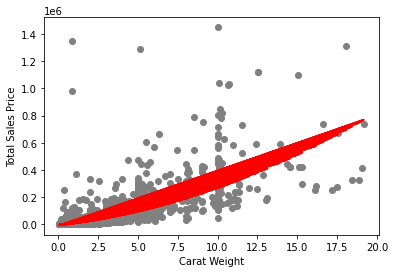

The coefficient for the squared term (carat_weight^2) is 1420.99
The coefficient for the linear term (carat_weight) is 13113.76
The intercept is -4847.20
The R-squared value is 0.59


In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Read in the data
df = pd.read_csv('diamonds.csv')

# Select the features and target variable
X = df['carat_weight'].values.reshape(-1, 1)
y = df['total_sales_price'].values

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Perform polynomial regression
poly_reg = PolynomialFeatures(degree=2)
X_poly_train = poly_reg.fit_transform(X_train)
X_poly_test = poly_reg.transform(X_test)
regressor = LinearRegression()
regressor.fit(X_poly_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_poly_test)

# Plot the results
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('Carat Weight')
plt.ylabel('Total Sales Price')
plt.show()

print('The coefficient for the squared term (carat_weight^2) is {:.2f}'.format(regressor.coef_[2]))
print('The coefficient for the linear term (carat_weight) is {:.2f}'.format(regressor.coef_[1]))
print('The intercept is {:.2f}'.format(regressor.intercept_))
print('The R-squared value is {:.2f}'.format(regressor.score(X_poly_test, y_test)))

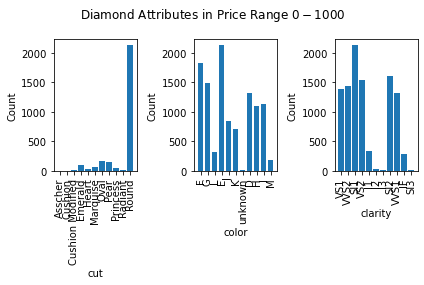

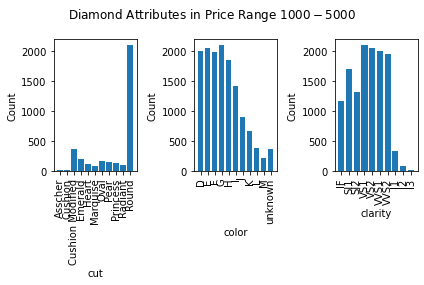

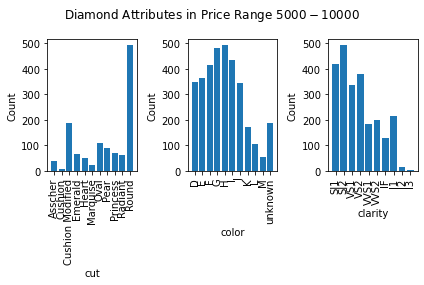

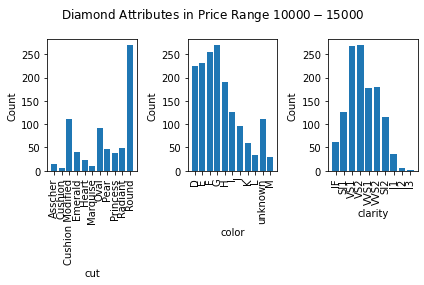

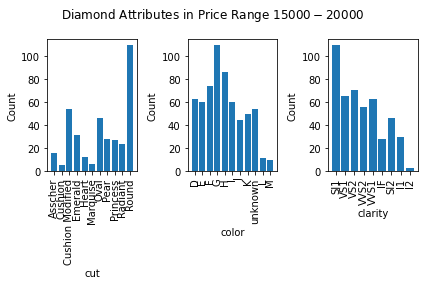

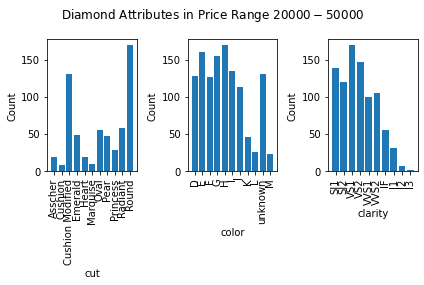

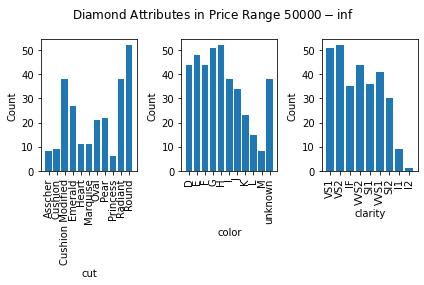

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

# Read in the data
df = pd.read_csv('diamonds.csv')

# Define the price ranges
price_ranges = [(0, 1000), (1000, 5000), (5000, 10000), (10000, 15000), (15000, 20000), (20000, 50000), (50000, float('inf'))]

# Create a function to categorize prices into the defined ranges
def categorize_price(price):
    for i, r in enumerate(price_ranges):
        if price >= r[0] and price < r[1]:
            return i

# Categorize the prices and add a new column to the dataframe
df['price_range'] = df['total_sales_price'].apply(categorize_price)

# Group the data by price range and attribute, and count the occurrences
grouped = df.groupby(['price_range', 'cut', 'color', 'clarity']).size().reset_index(name='count')

# Plot the distribution of attributes in each price range
for i, r in enumerate(price_ranges):
    plt.figure()
    plt.suptitle('Diamond Attributes in Price Range $' + str(r[0]) + ' - $' + str(r[1]))
    df_range = grouped[grouped['price_range'] == i]
    for attr in ['cut', 'color', 'clarity']:
        plt.subplot(1, 3, ['cut', 'color', 'clarity'].index(attr) + 1)
        plt.bar(df_range[attr], df_range['count'])
        plt.xticks(rotation=90)
        plt.xlabel(attr)
        plt.ylabel('Count')
    plt.tight_layout()
    plt.show()